<div align="center">
    <h1>Asignación 1</h1>
</div>

### 1. Importart librerías y leer imagen

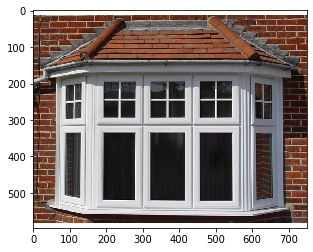

In [1]:
# Importar librerías
import copy
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Leer imagen
img = cv2.imread('img.webp')

# convertir la imagen a gris
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


# Mostrar imagen en una gráfica
imagen = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(imagen)

### 2. Transofrmada de Hough 

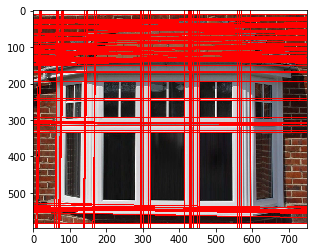

In [2]:
# Copiar imagen
im = copy.copy(img)

# Definir las esquinas
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

# Definir las líneas
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

for i in range(len(lines)):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(im,(x1,y1),(x2,y2),(0,0,255),2)

# Guardar imagen
cv2.imwrite('res/hough_2_1.jpg',im)

# Mostrar imagen en una gráfica
imagen = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(imagen)


### 3. Transformada Probabilístico de Hough

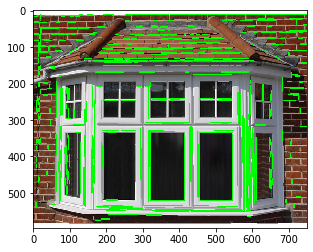

In [3]:
# Copiar imagen
im = copy.copy(img)

# Definir las esquinas
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

# Parámetros de Línea
minLineLength = 100
maxLineGap = 10

# Crear las líneas
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

# Dibujar las líneas
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(im,(x1,y1),(x2,y2),(0,255,0),2)

# Guardar imagen
cv2.imwrite('res/hough_2_2.jpg',im)

# Mostrar imagen en una gráfica
image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(image)
